# GBM

The definition og **Geometric Brownian Motion** is

$$S_{t}=S_{0}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right)}\\
S_{T}=S_{t}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)(T-t)+\sigma W_{T-t}\right)}\\
E(S_t)=S_0e^{(\mu-\sigma^2/2)t}E(e^{\sigma B_t}).$$

Since $E(e^{\sigma B_t})=e^{u^2/2}$ for every real number $u$ and every standard normal random variable $Z$, the identity $E(e^{\sigma B_t})=e^{\sigma^2 t/2}$ follows from the fact that σBt is distributed like $\sigma t \sqrt{Z}$. Simplifying, one gets the same expression of E(Xt) than by the direct route, namely,


$$E(S_t)=E(S_0)e^{\mu t}.$$

$$E \left( \frac{S_t}{S_0} \right) =e^{\mu t}.$$

- [link1](https://math.stackexchange.com/questions/176196/calculate-the-expected-value-of-y-ex-where-x-sim-n-mu-sigma2)
- [link2](https://quant.stackexchange.com/questions/32244/geometric-brownian-motion-percentage-returns-vs-log-returns)
- [link3](https://math.stackexchange.com/questions/40826/expectation-of-geometric-brownian-motion)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
def gen_paths(S0, r, sigma, T, I):
    dt =T
    paths = np.zeros((T + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, T + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * 1 +
                                         sigma * np.sqrt(1) * rand)
        
    return paths


S0 = 100.
r = 0.005
sigma = 0.02
T = 300
i = 500

In [54]:
simulations = pd.DataFrame(gen_paths(S0, r, sigma, T, i))

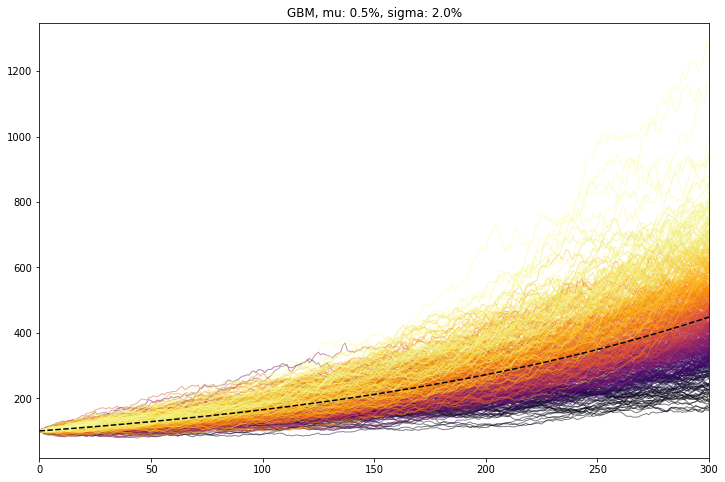

In [56]:
title_str = """GBM, mu: %s%%, sigma: %s%%""" % (str(round(r*100, 1)), str(round(sigma*100, 1)))
simulations.sort_values(simulations.index[-1], axis=1).plot(legend=False,
                                                            figsize=(12, 8), 
                                                            cmap='inferno', 
                                                            linewidth=1,
                                                            alpha=0.5,
                                                            title=title_str)


l = [S0]
for i in np.arange(1, T + 1):
    l.append(l[-1] * np.exp(r))

pd.Series(l).plot(color='black', linestyle='--')
    

    plt.show()

In [77]:
print('------------------------------------------------------')
print('Realized Standard Deviation: ', round(np.log(simulations.iloc[-1]/100).std(), 3))
print('Theoretical Standard Deviation: ', round(np.sqrt(300)*sigma, 3))
print('Variance Ratio Test: ', round(((np.log(simulations.iloc[-1]/100).std())**2)/(300*sigma**2), 3))
print('------------------------------------------------------')

------------------------------------------------------
Realized Standard Deviation:  0.347
Theoretical Standard Deviation:  0.346
Variance Ratio Test:  1.004
------------------------------------------------------


In that case we were able to compute the variance ratio test through simulations; since usually we will test a single time series, the ratio test should be obtained through overlapping tjhe available time series etc. This is done through the following library: 

In [ ]:
from arch.unitroot import VarianceRatio

The mathematical description of a mean-reverting price series is that the change of the price series in the next period is proportional to the diff erence between the mean price and the current price. This gives rise to the ADF test, which tests whether we can reject the null hypothesis that the proportionality constant is zero.

However, the mathematical description of a stationary price series is that the variance of the log of the prices increases slower than that of a geometric random walk. Intuitively speaking, a “stationary” price series means that the prices diff use
from its initial value more slowly than a geometric random walk would. Mathematically, we can determine the nature of the price series by measuring this speed of diffusion. The speed of diffusion can be characterized by the variance:

$$Var(\tau) = E(|z(t + \tau) − z(t)|^2)$$

where $z$ is the log prices $(z = \text{log}(y))$ and $\tau$ is an arbitrary time lag. For a **geometric random walk**, we know that:

$$Var(\tau) = E(|z(t + \tau) − z(t)|^2) ∼ \tau$$

that is, it is **proportional** to $\tau$.

In [57]:
def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)

    # Helper variables used during calculations
    lagvec = []
    tau = []
    
    # Create the range of lag values
    lags = range(2, 100)

    #  Step through the different lags
    for lag in lags:
        #  produce value difference with lag
        pdiff = np.subtract(ts[lag:],ts[:-lag])
        #  Write the different lags into a vector
        lagvec.append(lag)
        #  Calculate the variance of the difference vector
        tau.append(np.sqrt(np.std(pdiff)))

    #  linear fit to double-log graph
    m = np.polyfit(np.log10(np.asarray(lagvec)),
                   np.log10(np.asarray(tau).clip(min=0.0000000001)), 1)
    
    # return the calculated hurst exponent
    return m[0]*2.0

In [62]:
simulations.std()

0      135.822078
1      176.518462
2       94.567232
3       35.350918
4      143.396270
          ...    
495     45.003542
496     64.027373
497     63.577332
498     38.583993
499     26.534815
Length: 500, dtype: float64

In [102]:
def hurst(ts):
  
    """
    Return the Hurst Exponent of the time series vector ts
    """
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variance of the lagged differences
    
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)

    # Return Hurst exponent from polyfit output
    return poly[0]*2.0

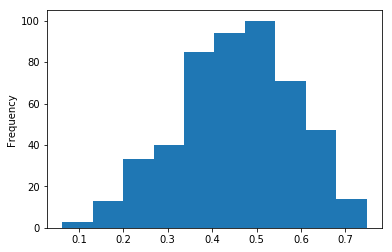

In [109]:
aa = []
for i in simulations.columns: 
    aa.append(hurst(simulations.loc[:, i].values))



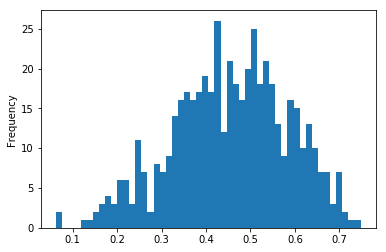

In [111]:
pd.Series(aa).plot(kind='hist', bins=50)